In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [6]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
os.chdir(wkdir)

In [3]:
data_year = "2020"
cell_name = "CAL29"

data_dir = os.path.join("00_outputs_" + data_year + "_" + cell_name)

#out_dir = "00_plots_" + data_year + "_" + cell_name + "_" 
#os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [7]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_CAL29_24H:A03,-0.080008,0.299000,-0.358535,0.607407,0.273957,-0.342600,0.485377,0.194704,0.127850,-0.124635,...,0.796081,0.527034,-0.923981,-0.914088,-0.130942,-0.646923,-0.512850,0.228304,0.214569,0.365473
ASG002_CAL29_24H:A04,-0.328507,0.145749,-0.088684,-0.133493,-0.053592,0.022400,0.081677,-0.389596,-0.042950,0.124016,...,0.561081,0.181935,0.395420,-0.736189,0.043908,0.600277,0.065350,0.207504,-0.078031,0.359373
ASG002_CAL29_24H:A05,-0.094208,0.111500,1.150316,0.198558,0.155808,-0.164900,0.076427,0.271704,0.193250,0.199615,...,0.141381,-0.094615,0.395119,-1.137388,0.046408,-0.970223,-0.218301,0.343904,-0.209031,-0.378327
ASG002_CAL29_24H:A06,-0.328857,0.200950,1.132116,-0.001092,0.050158,-0.239000,-0.084523,-0.675446,-0.188350,-0.258985,...,-0.725219,-0.334565,0.515119,-1.421788,-0.088892,0.345577,0.091350,-0.014446,0.251569,0.299674
ASG002_CAL29_24H:J13,0.384643,-0.083000,0.674916,-0.336792,0.453207,-0.029100,-0.169523,-0.452997,0.201750,0.177415,...,-0.578620,0.041284,-0.987181,0.581712,-0.168792,2.835777,0.036550,-0.308546,-0.473731,0.067973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,0.720000,0.089350,0.012950,-0.500700,0.337650,0.316625,0.299450,-0.705950,0.975199,-0.910450,...,-0.963500,-0.261600,1.784900,-0.120050,-0.014525,1.182849,0.200700,-0.805175,0.311750,-0.539150
MOAR012_CAL29_24H:P21,0.228000,0.163050,0.878400,0.325050,0.363550,-0.015475,-0.047050,-1.016950,0.911200,-0.180750,...,-0.806199,-0.280700,-0.057600,0.419049,0.086025,-0.730350,-0.054000,-0.219225,-0.068200,-0.620500
MOAR012_CAL29_24H:P22,1.011800,-0.041500,-0.527250,-0.282749,0.222350,0.847425,0.118650,0.719150,0.086600,-0.913651,...,-0.483850,-0.268950,0.182800,-0.475250,0.152575,-0.222650,0.165400,-0.000625,0.029600,-0.893850
MOAR012_CAL29_24H:P23,0.460600,-0.018550,-0.058700,-0.151549,0.265350,0.616323,0.253850,0.040050,0.322900,-0.266550,...,-0.682250,-0.032701,-0.262151,0.196850,0.215825,-0.714250,0.070750,-0.597925,-0.226200,-0.002400


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [8]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_CAL29_24H:A03,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A04,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A05,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:A06,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_CAL29_24H:J13,CAL29,ASG002,24 h,ASG002_CAL29_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_CAL29_24H:P21,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_CAL29_24H:P22,CAL29,MOAR012,24 h,MOAR012_CAL29_24H_X1_B35:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


In [9]:
sig_info_cell_df['pert_drug'].unique()

array(['DMSO', 'CGS-15943', 'taselisib', 'TW-37', 'lorazepam',
       'AS-605240', 'calcipotriol', 'AZD-8055', 'XL-888', 'ABT-751',
       'AMG-232', 'RITA', 'indinavir', 'cabozantinib', 'nocodazole',
       'nelfinavir', 'AG-14361', 'PJ-34', 'procaterol', 'nutlin-3',
       'NVP-BEZ235', 'MG-132', 'NVP-AUY922', 'birinapant', 'gatifloxacin',
       'panobinostat', 'R-547', 'oncrasin-1', 'rucaparib', 'imatinib',
       'BRD-K76674262', 'zolpidem', 'anagrelide', 'levosulpiride',
       'obatoclax', 'masitinib', 'roscovitine', 'LY-294002', 'alvocidib',
       'lomerizine', 'floxuridine', 'sorafenib', 'gefitinib', 'alectinib',
       'trifluoperazine', 'epirubicin', 'axitinib', 'trametinib',
       'tamibarotene', 'vorinostat', 'tandutinib', 'chelidonine',
       'entinostat', 'BI-2536', 'olaparib', 'camptothecin', 'digoxin',
       'fostamatinib', 'erlotinib', 'ABT-737', 'YM-155', 'equilin',
       'daunorubicin', 'dasatinib', 'orciprenaline', 'lapatinib',
       'AM-580', 'ponatinib', 'C

## Input_info - ALL_DATA (modules, STV)

In [10]:
#data_file = "ALL_DATA_" + data_year + "_" + task + ".xlsx"
modules = pd.read_excel(os.path.join(data_dir,'ALL_DATA_2020_Jing.xlsx'), sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
CDK4_6
EGFR
PI3K
FGFR
TOP2A
p53
Estrogen


## STV (State Transition Vectors)

In [11]:
# load STV data frame
STVs = pd.read_excel(os.path.join(data_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "STV", index_col = 0)

states = STVs.columns.to_list()
print("States:", states)

States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


In [12]:
STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

STV_df.loc[STVs.index] = STVs

display(STV_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
AARS,0.016052,0.078487,0.000000
ABCB6,0.001612,0.027125,-2.890931
ABCC5,-0.016742,0.002121,0.000000
ABCF1,-0.038990,-0.028959,-0.496186
ABCF3,0.023288,0.036671,0.000000
...,...,...,...
ZNF395,0.000000,0.000000,0.000000
ZNF451,0.011450,0.013403,0.000000
ZNF586,0.000000,0.000000,0.119103
ZNF589,0.000000,0.000000,0.000000


## DPD calculating

In [13]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

In [15]:
DPD_df

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_CAL29_24H:A03,0.0,0.0,0.0
ASG002_CAL29_24H:A04,0.0,0.0,0.0
ASG002_CAL29_24H:A05,0.0,0.0,0.0
ASG002_CAL29_24H:A06,0.0,0.0,0.0
ASG002_CAL29_24H:J13,0.0,0.0,0.0
...,...,...,...
MOAR012_CAL29_24H:P20,0.0,0.0,0.0
MOAR012_CAL29_24H:P21,0.0,0.0,0.0
MOAR012_CAL29_24H:P22,0.0,0.0,0.0
MOAR012_CAL29_24H:P23,0.0,0.0,0.0


In [16]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, ])

display(DPD_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_CAL29_24H:A03,0.440058,0.199186,-17.205800
ASG002_CAL29_24H:A04,-0.007124,-0.210494,-1.647670
ASG002_CAL29_24H:A05,-0.591123,-0.275990,-8.143910
ASG002_CAL29_24H:A06,0.239735,-0.691577,1.262752
ASG002_CAL29_24H:J13,-0.481015,-0.360096,-0.272978
...,...,...,...
MOAR012_CAL29_24H:P20,-0.868192,1.033514,12.507969
MOAR012_CAL29_24H:P21,0.092125,-0.190923,6.671166
MOAR012_CAL29_24H:P22,0.288556,0.046897,17.547616
MOAR012_CAL29_24H:P23,-0.216856,-0.363952,7.281315


In [17]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
ASG002_CAL29_24H:A03,0.440058,0.199186,-17.205800,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A04,-0.007124,-0.210494,-1.647670,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A05,-0.591123,-0.275990,-8.143910,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:A06,0.239735,-0.691577,1.262752,DMSO,DMSO_No_target,0 uM
ASG002_CAL29_24H:J13,-0.481015,-0.360096,-0.272978,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...,...
MOAR012_CAL29_24H:P20,-0.868192,1.033514,12.507969,BAY-61-3606,,3.33 uM
MOAR012_CAL29_24H:P21,0.092125,-0.190923,6.671166,BAY-61-3606,,1.11 uM
MOAR012_CAL29_24H:P22,0.288556,0.046897,17.547616,ethaverine,,10 uM
MOAR012_CAL29_24H:P23,-0.216856,-0.363952,7.281315,ethaverine,,3.33 uM


In [22]:
#DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
#DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".csv"))

In [19]:
#print(os.path.join(out_dir, "DPD_" + data_year + "_" + cell_name + "_" + task + ".xlsx"))

00_plots_2020_BC3C_/DPD_2020_BC3C_Jing.xlsx


## Analisys of DPD values to find targets

In [18]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
MOAR010_CAL29_24H:P14,-1.789949,0.944867,-2.471806,mycophenolate-mofetil,"IMPDH1, IMPDH2",3.33 uM
MOAR010_CAL29_24H:F17,-1.652579,-0.180500,11.809079,mestinon,ACHE,3.33 uM
MOAR011_CAL29_24H:G06,-1.602225,-0.697464,1.818591,phlorizin,"SLC5A1, SLC5A2",1.11 uM
MOAR011_CAL29_24H:P13,-1.593556,0.052905,18.920974,stanozolol,,10 uM
MOAR008_CAL29_24H:E12,-1.573803,0.351918,-7.330903,BRD-K84214706,,1.11 uM
MOAR010_CAL29_24H:J12,-1.502870,0.482356,17.288171,cryptotanshinone,STAT3,1.11 uM
MOAR008_CAL29_24H:A16,-1.455018,0.301752,-8.608108,etacrynic-acid,SLC12A1,10 uM
MOAR010_CAL29_24H:J09,-1.454653,0.077889,13.455405,paraxanthine,,1.11 uM
MOAR010_CAL29_24H:A05,-1.349120,0.671928,6.165748,SCH-58261,"ADORA1, ADORA2A",3.33 uM
ASG002_CAL29_24H:D17,-1.313439,-0.138781,-7.163958,oncrasin-1,,1.11 uM


Targets: 14 ['', 'ABL1, ACVR1, RIPK2', 'ACHE', 'ADORA1, ADORA2A', 'ATP1A1', 'ATP2B1, PDE1A', 'AURKA, AURKB, CDK1, CDK2', 'IMPDH1, IMPDH2', 'MAOB', 'PLK1', 'SLC12A1', 'SLC5A1, SLC5A2', 'STAT3', 'TOP2A']


In [24]:
states

['x']

In [19]:
i = 1
top = 10

# Assuming states is a list of column names in DPD_inf_df
state_column = states

# Sorting the DataFrame based on the values in the specified state column
sorted_DPD_inf_df = DPD_inf_df.sort_values(by=state_column)

# Selecting the top and bottom rows based on the sorted values in the state column
top_rows = sorted_DPD_inf_df[:top]
bottom_rows = sorted_DPD_inf_df[len(DPD_inf_df.index) - top:]

# Concatenating the selected rows into a new DataFrame
DPD_analysis = pd.concat([top_rows, bottom_rows], axis=0)

# Displaying the concatenated DataFrame
display(DPD_analysis)

# Printing the number of unique targets and their sorted list
print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))


,blca_invasiveness,blca_oncogenesis,blca_survival,pert_drug,targets,dose
MOAR010_CAL29_24H:P14,-1.789949,0.944867,-2.471806,mycophenolate-mofetil,"IMPDH1, IMPDH2",3.33 uM
MOAR010_CAL29_24H:F17,-1.652579,-0.180500,11.809079,mestinon,ACHE,3.33 uM
MOAR011_CAL29_24H:G06,-1.602225,-0.697464,1.818591,phlorizin,"SLC5A1, SLC5A2",1.11 uM
MOAR011_CAL29_24H:P13,-1.593556,0.052905,18.920974,stanozolol,,10 uM
MOAR008_CAL29_24H:E12,-1.573803,0.351918,-7.330903,BRD-K84214706,,1.11 uM
MOAR010_CAL29_24H:J12,-1.502870,0.482356,17.288171,cryptotanshinone,STAT3,1.11 uM
MOAR008_CAL29_24H:A16,-1.455018,0.301752,-8.608108,etacrynic-acid,SLC12A1,10 uM
MOAR010_CAL29_24H:J09,-1.454653,0.077889,13.455405,paraxanthine,,1.11 uM
MOAR010_CAL29_24H:A05,-1.349120,0.671928,6.165748,SCH-58261,"ADORA1, ADORA2A",3.33 uM
ASG002_CAL29_24H:D17,-1.313439,-0.138781,-7.163958,oncrasin-1,,1.11 uM


Targets: 14 ['', 'ABL1, ACVR1, RIPK2', 'ACHE', 'ADORA1, ADORA2A', 'ATP1A1', 'ATP2B1, PDE1A', 'AURKA, AURKB, CDK1, CDK2', 'IMPDH1, IMPDH2', 'MAOB', 'PLK1', 'SLC12A1', 'SLC5A1, SLC5A2', 'STAT3', 'TOP2A']


In [19]:
### copy manually
targets_list = ['AOC1', 'ATP4A', 'CDK2, CDK7, CDK9', 'CHRM1', 'DRD2, HTR2A', 'FFAR1', 'PDE11A, PDE5A', 'PPARG', 'PSMB1', 'PSMB1, PSMB2, PSMB5']
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 10 ['AOC1', 'ATP4A', 'CDK2, CDK7, CDK9', 'CHRM1', 'DRD2, HTR2A', 'FFAR1', 'PDE11A, PDE5A', 'PPARG', 'PSMB1', 'PSMB1, PSMB2, PSMB5']


## Plots for targets

In [17]:
print_drugs = []

### CDK1/2

In [20]:
target_name = "CDK1_CDK2"

target = "CDK1"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK2"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK1_CDK2: 4 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'roscovitine']


In [21]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


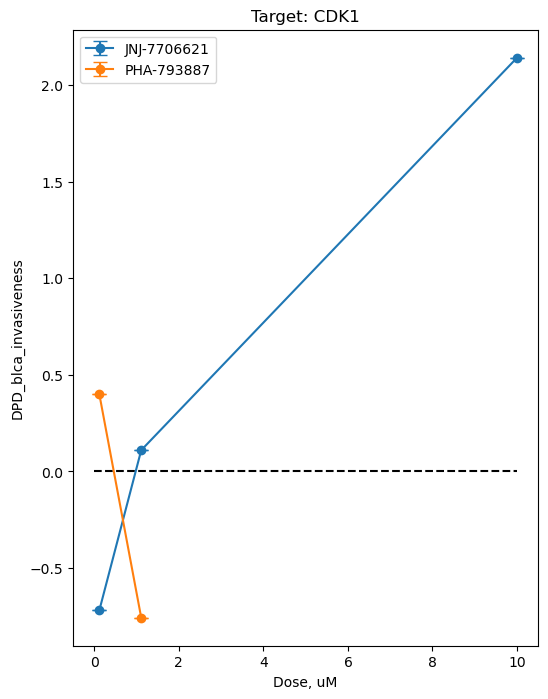

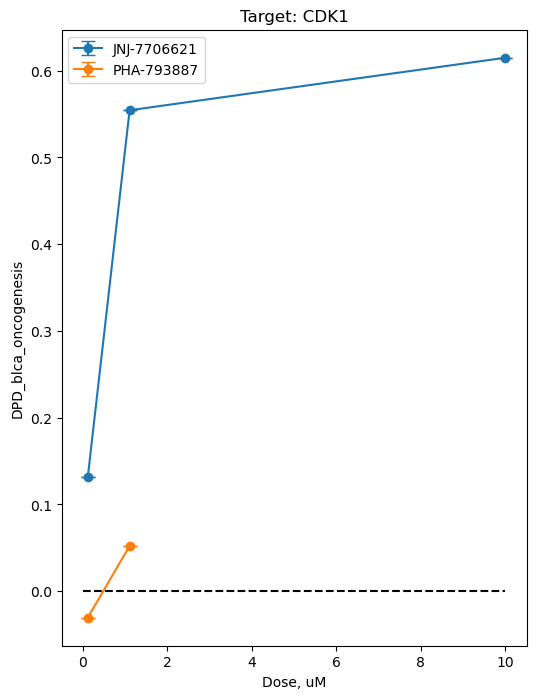

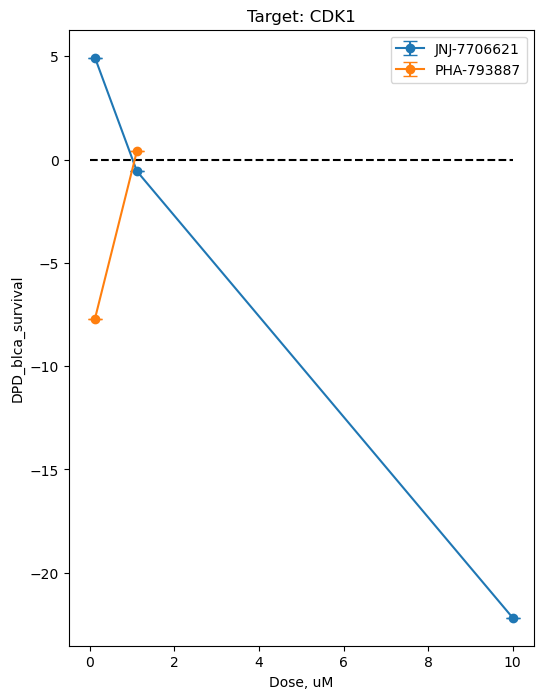

In [22]:
target_name = "CDK1"
target_drugs = ['JNJ-7706621', 'PHA-793887']

for DPD_val in states:
    plt.figure(figsize = (6,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

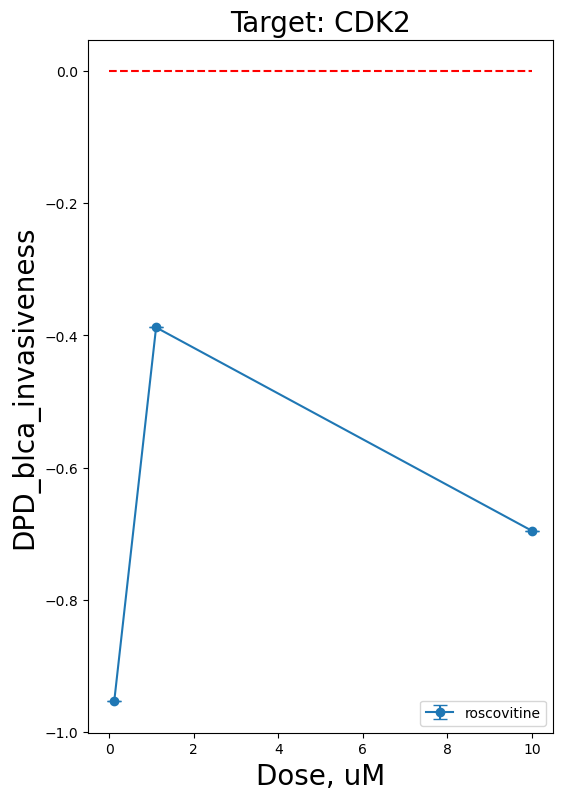

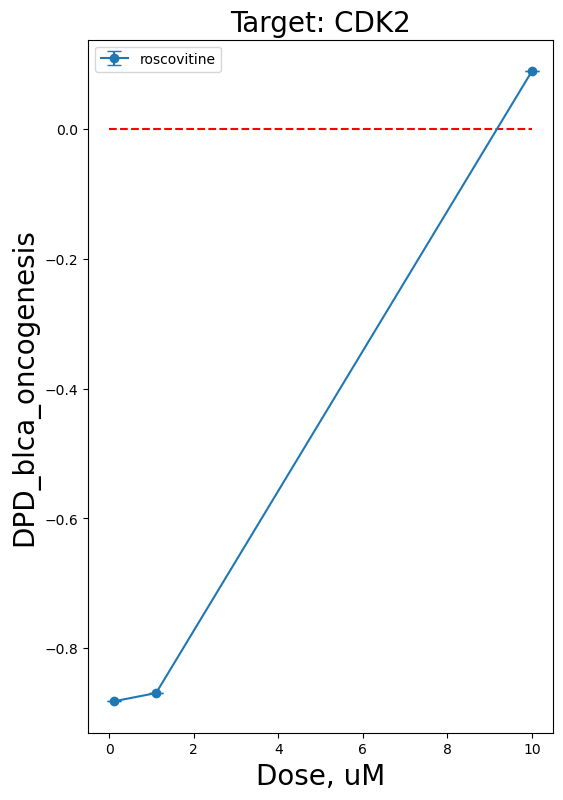

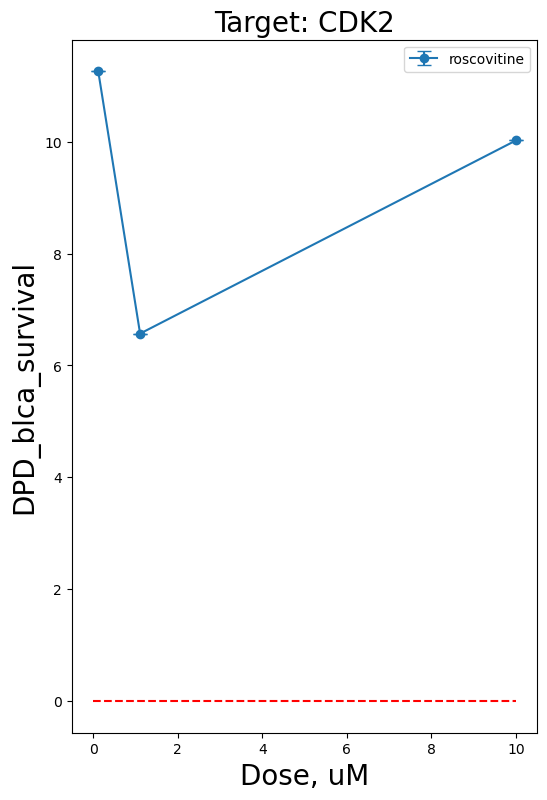

In [23]:
target_name = "CDK2"
target_drugs=['roscovitine']
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

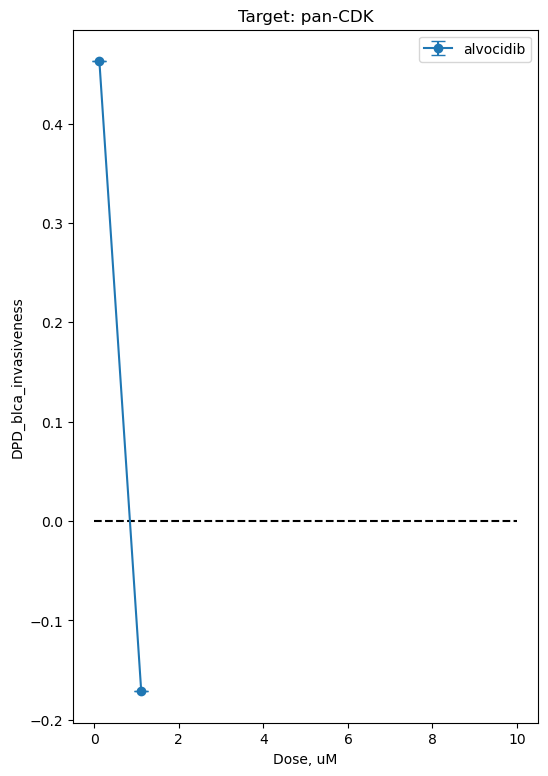

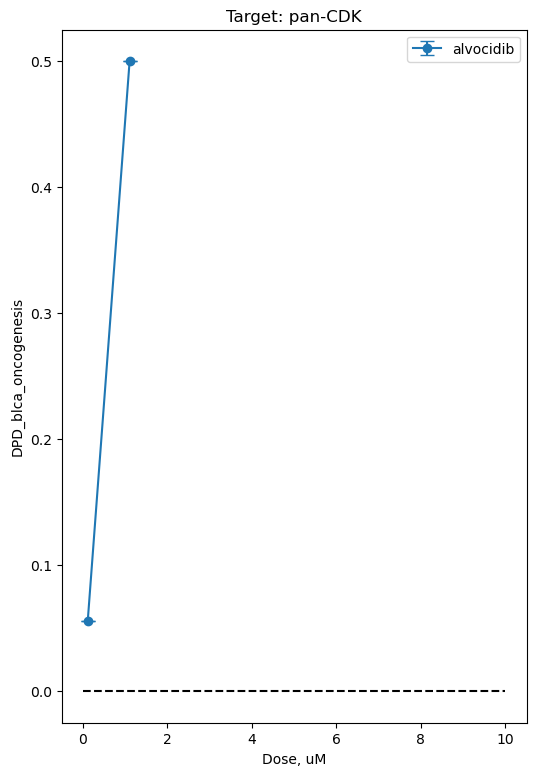

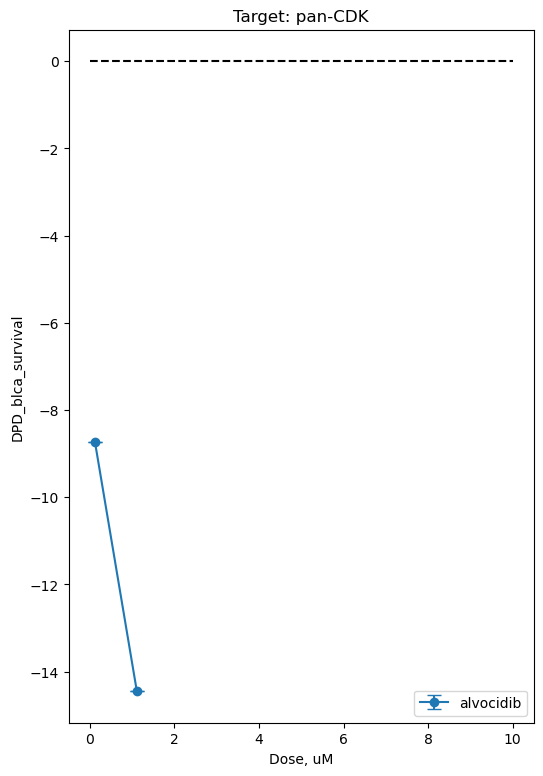

In [24]:
target_name = "pan-CDK"
target_drugs = ['alvocidib']

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PI3K

In [25]:
target = "PIK3"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK3: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [26]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"0.12 uM, 1.11 uM, 10 uM"


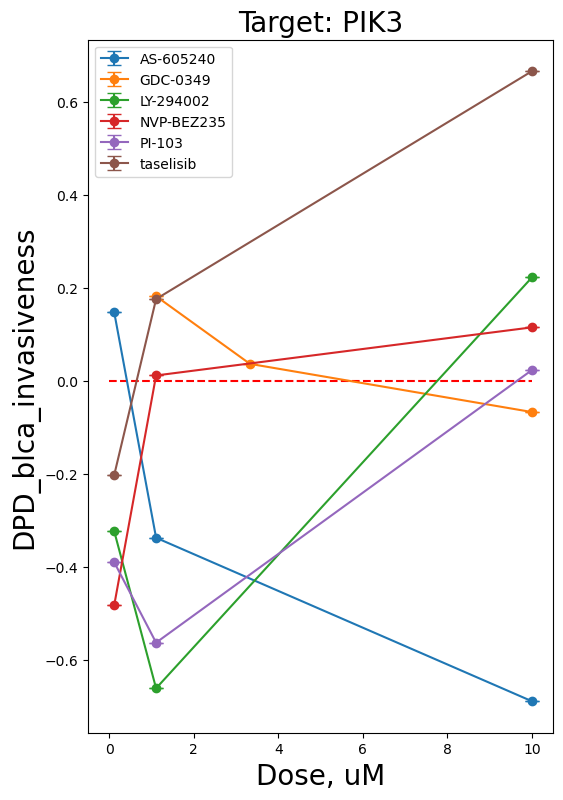

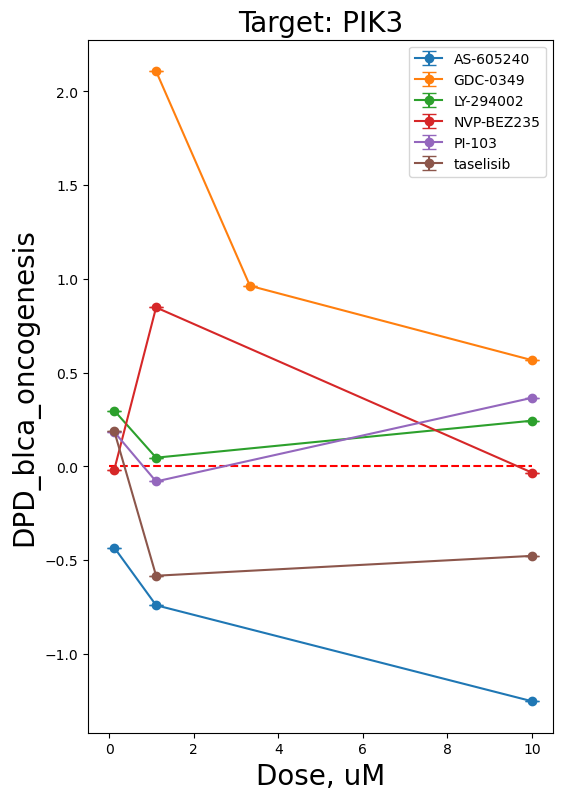

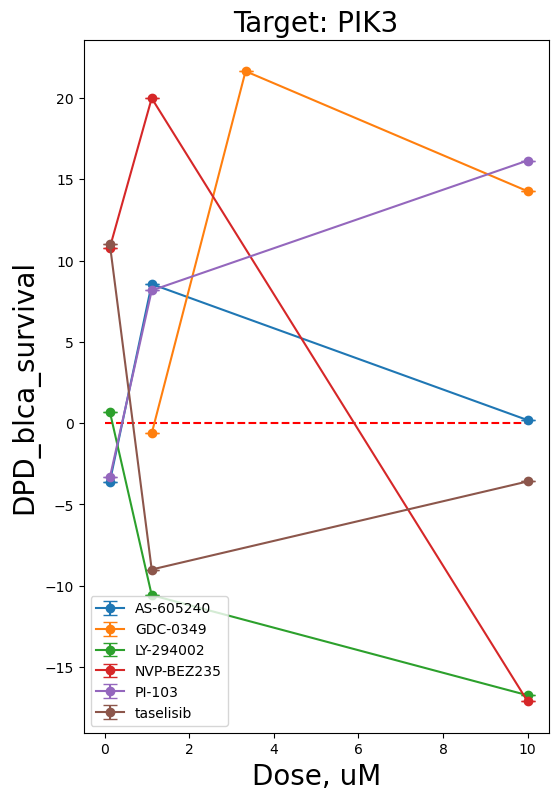

In [27]:
target_name = "PIK3"
target_drugs=drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### SRC

In [28]:
target = "SRC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target SRC: 1 ['dasatinib']


In [29]:
drugs_list = drugs +['ponatinib']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...","0.12 uM, 1.11 uM, 10 uM"
ponatinib,"ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, K...","0.12 uM, 1.11 uM"


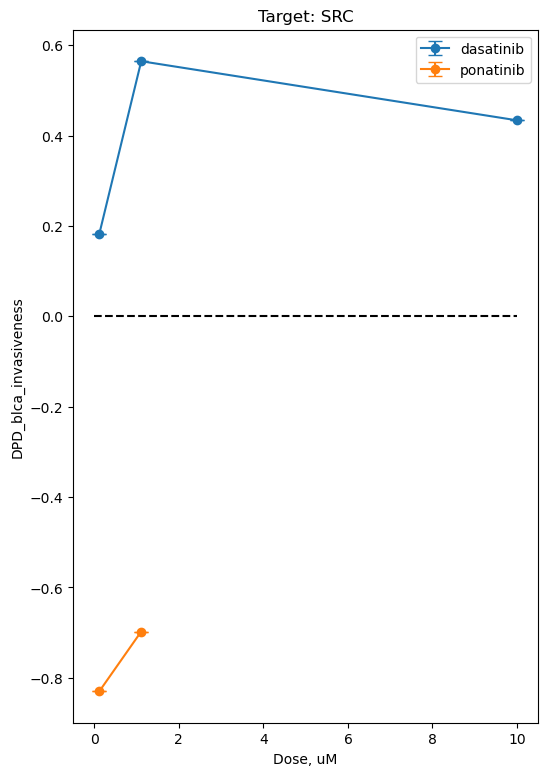

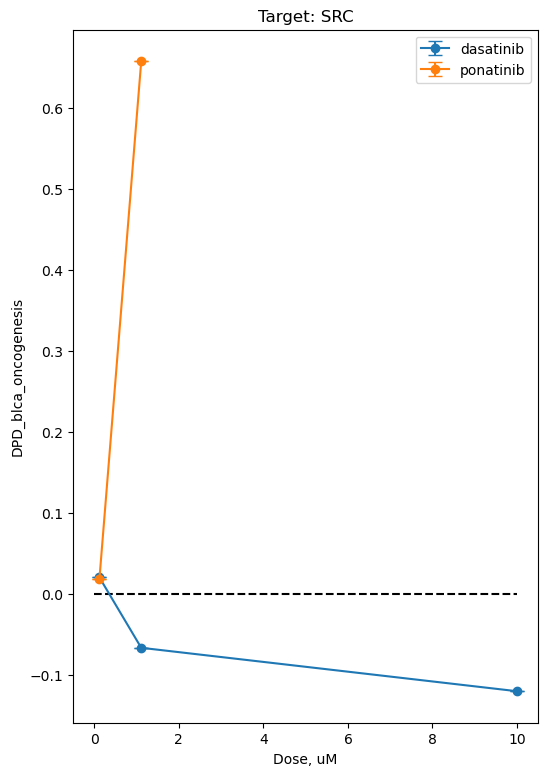

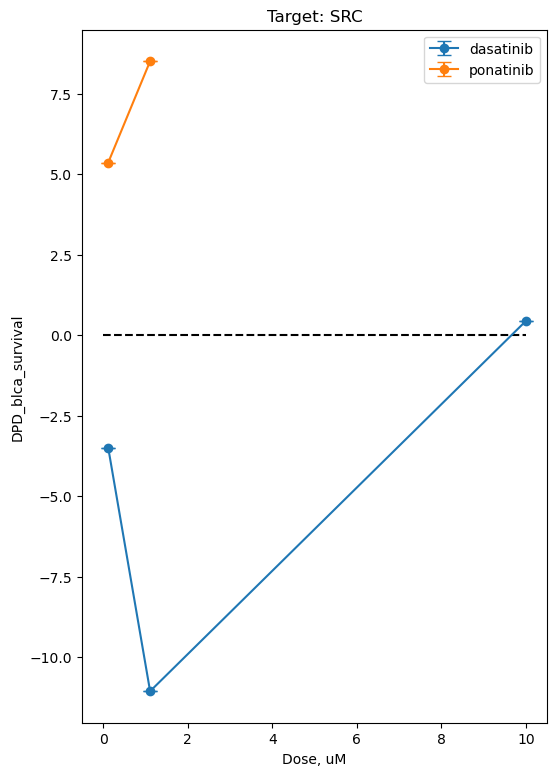

In [30]:
target_name = "SRC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### EGFR

In [32]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [33]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
gefitinib,EGFR,"1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


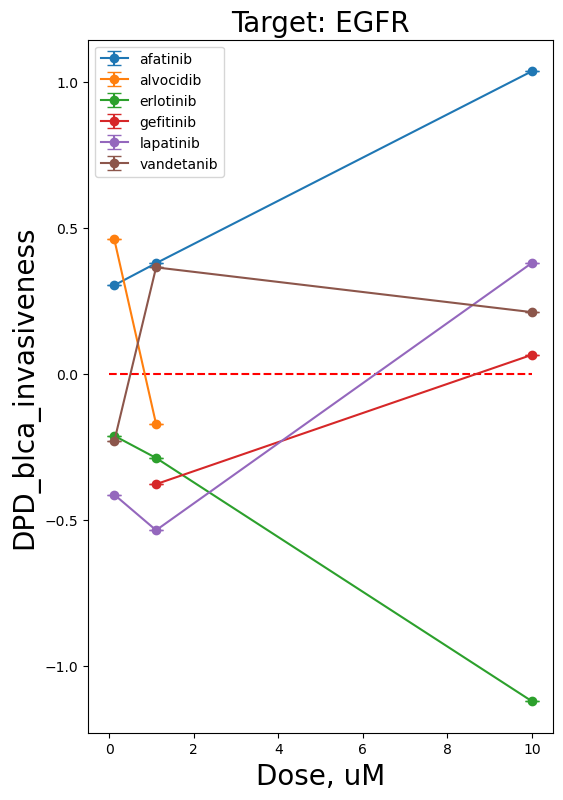

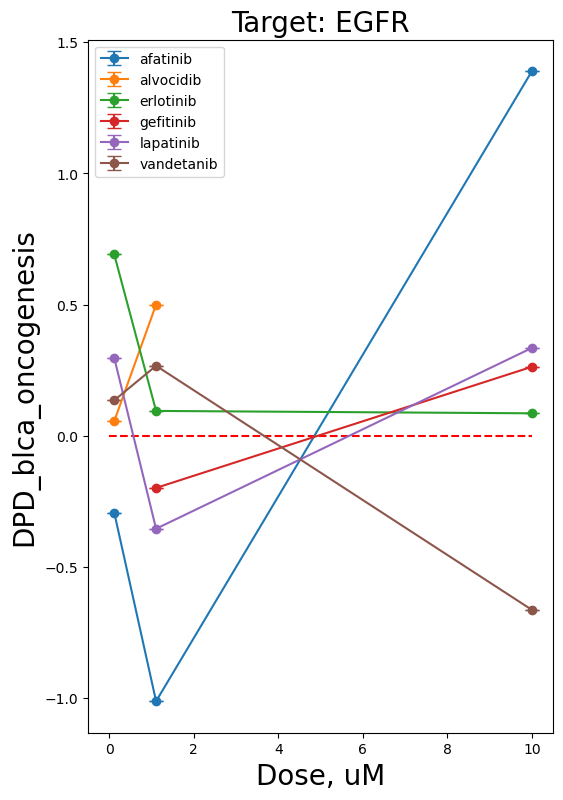

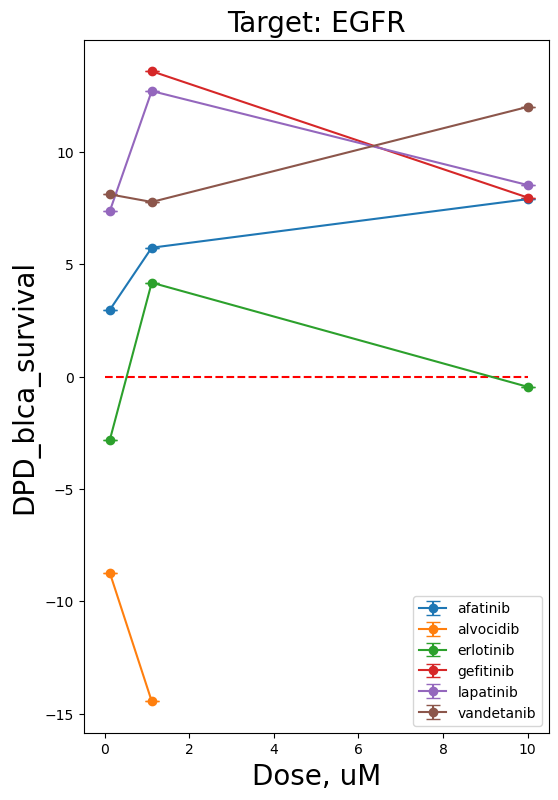

In [34]:
target_name = "EGFR"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### FGFR

In [35]:
target = "FGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target FGFR: 3 ['masitinib', 'ponatinib', 'sorafenib']


In [36]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
ponatinib,"ABL1, BCR, FGFR1, FGFR2, FGFR3, FGFR4, FLT3, K...","0.12 uM, 1.11 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM, 10 uM"


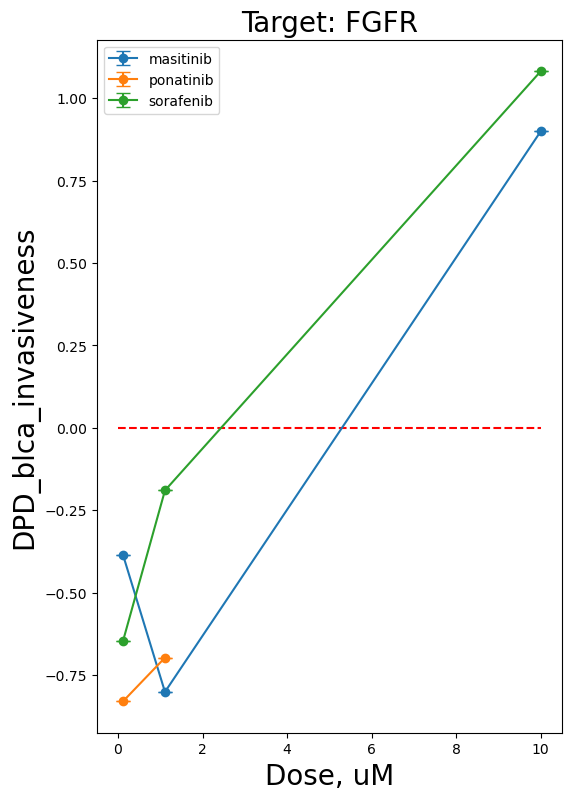

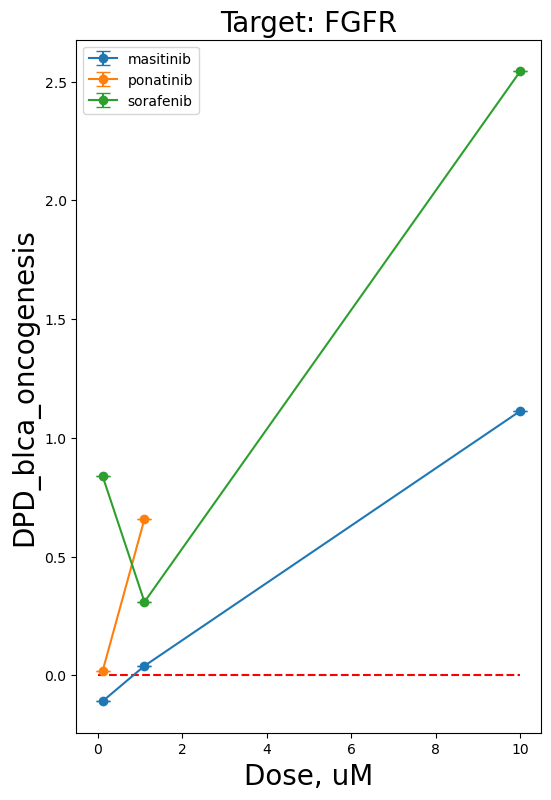

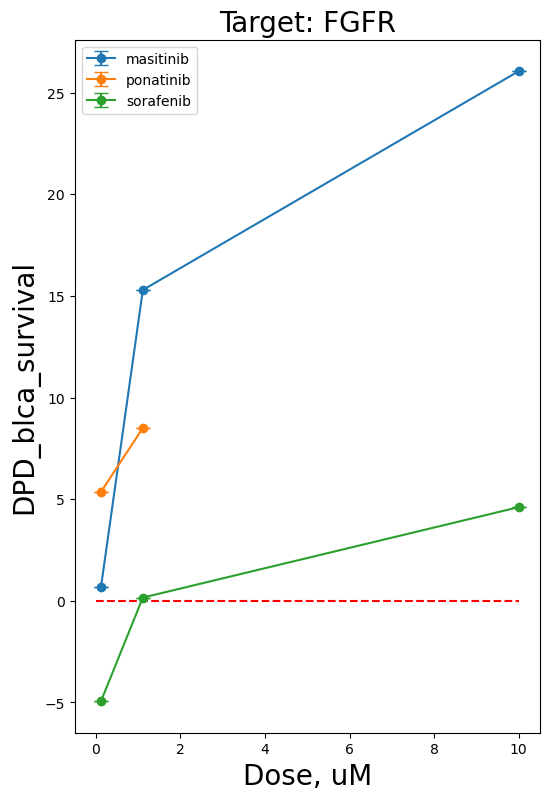

In [37]:
target_name = "FGFR"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### TOP2A

In [38]:
target = "TOP2A"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target TOP2A: 4 ['daunorubicin', 'epirubicin', 'idarubicin', 'mitoxantrone']


In [39]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
daunorubicin,TOP2A,"0.12 uM, 1.11 uM, 10 uM"
epirubicin,TOP2A,"0.12 uM, 1.11 uM"
idarubicin,TOP2A,"0.12 uM, 1.11 uM"
mitoxantrone,TOP2A,"0.12 uM, 1.11 uM, 10 uM"


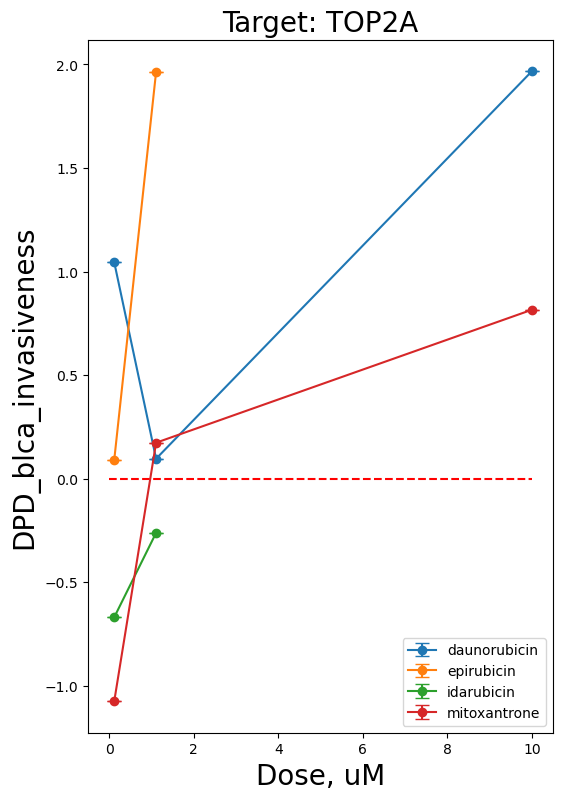

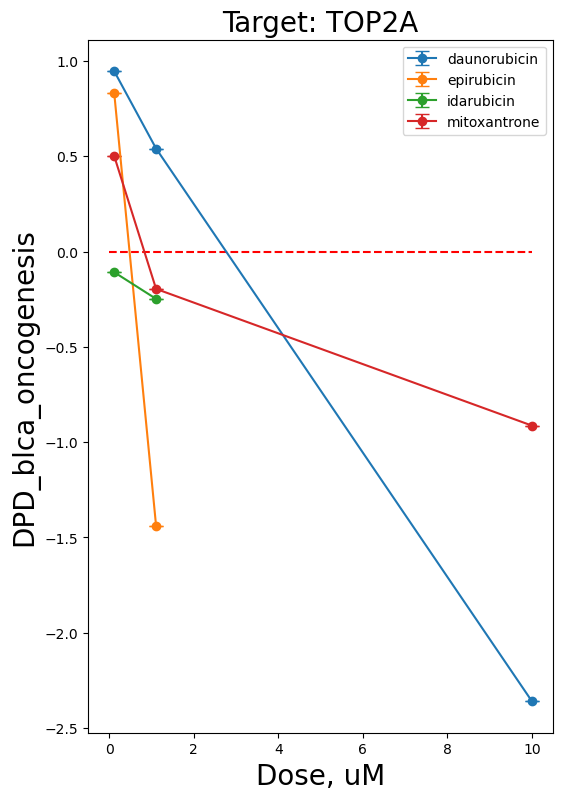

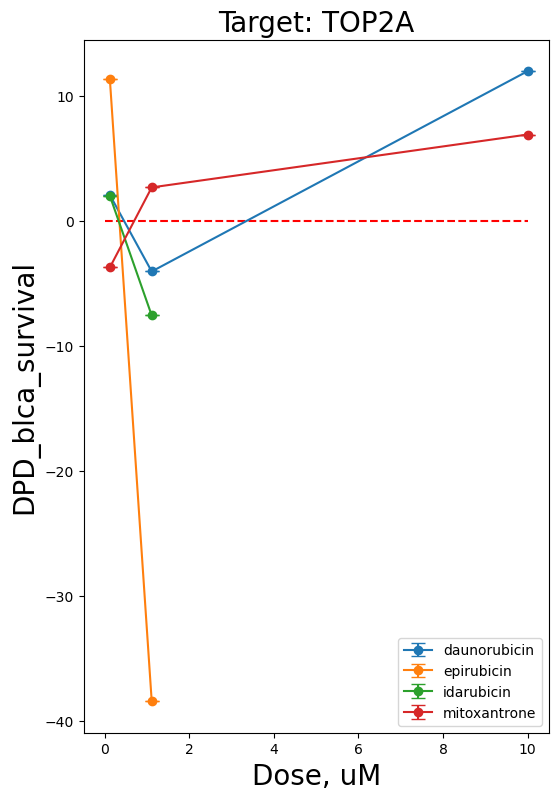

In [40]:
target_name = "TOP2A"
target_drugs= drugs
#target_drugs = ["CGP-60474", "dinaciclib", "roscovitine", "OTS-167", "PHA-767491"]
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### p53

In [41]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 6 ['AMG-232', 'HLI-373', 'RITA', 'SAR405838', 'nutlin-3', 'serdemetan']


In [42]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
HLI-373,MDM2,"1.11 uM, 10 uM, 3.33 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM, 3.33 uM"
SAR405838,MDM2,"1.11 uM, 10 uM, 3.33 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM, 3.33 uM"
serdemetan,MDM2,"1.11 uM, 10 uM, 3.33 uM"


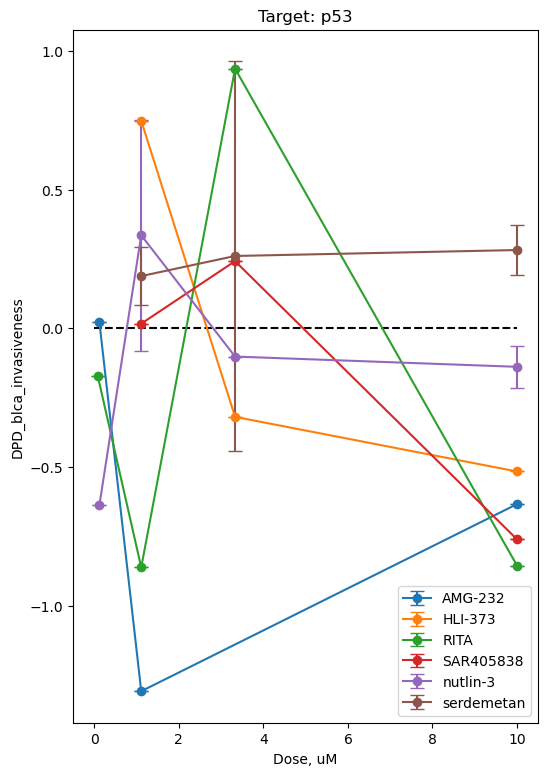

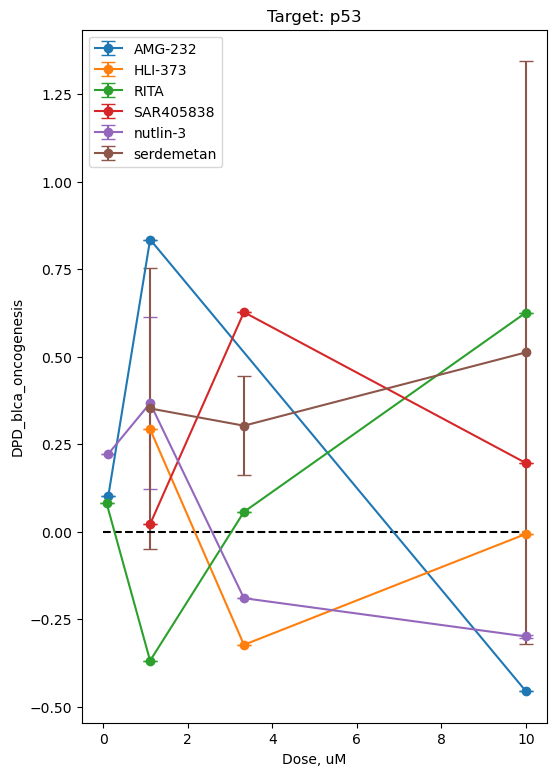

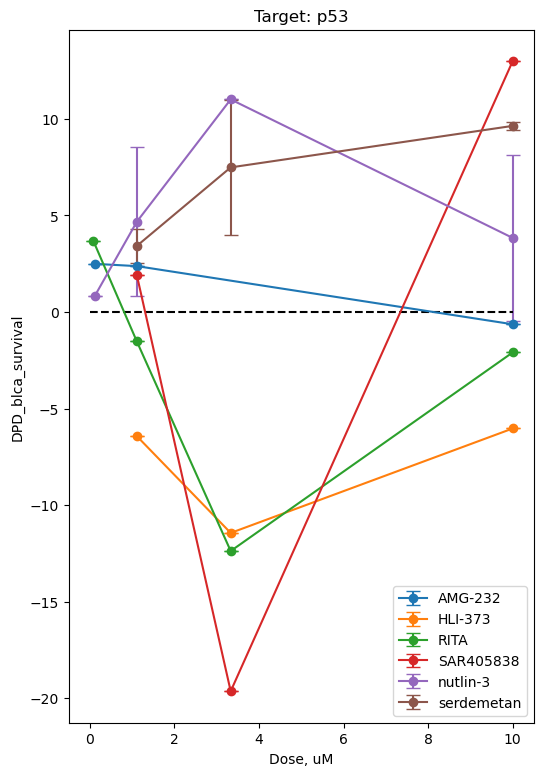

In [43]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Estrogen

In [44]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [45]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


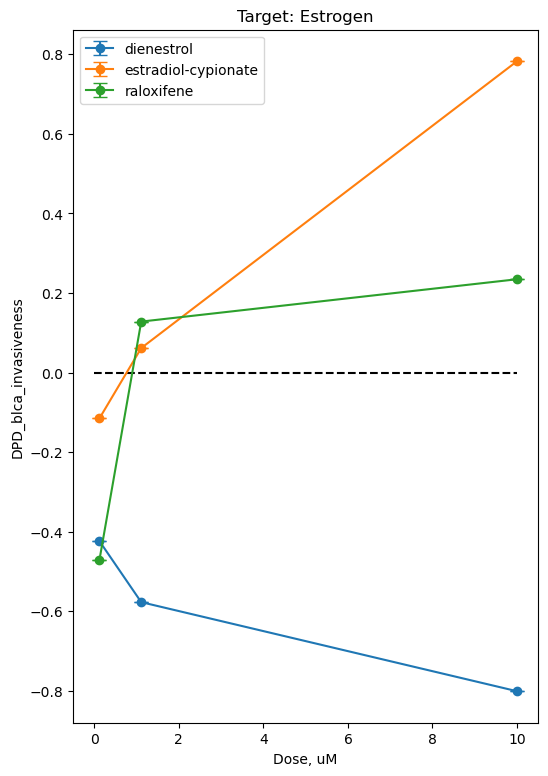

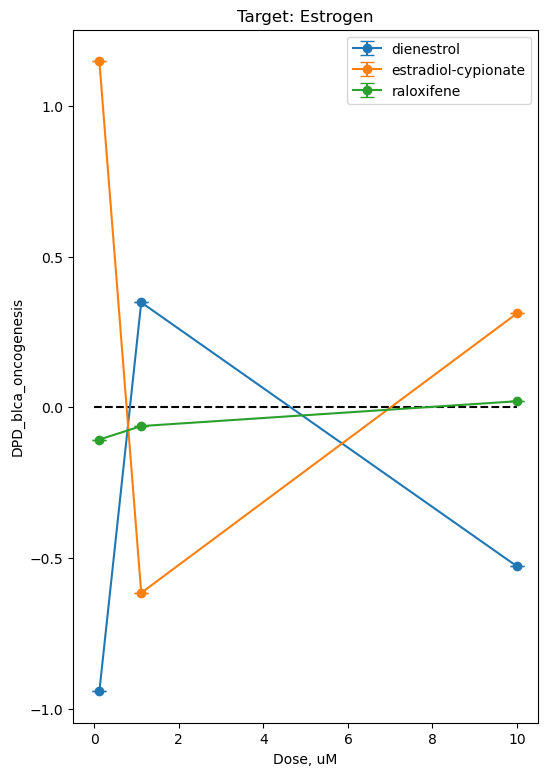

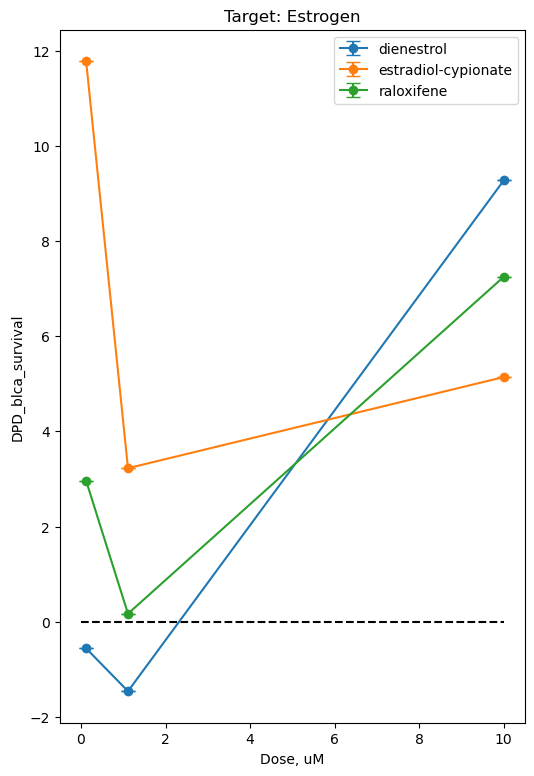

In [46]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Androgen

In [47]:
target = "AR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AR: 22 ['4-IBP', 'AG-14361', 'AM-580', 'API-001', 'BD-1063', 'GW-501516', 'L-693403', 'PRE-084', 'cutamesine', 'epitiostanol', 'etofylline-clofibrate', 'flufenamic-acid', 'nandrolone', 'olaparib', 'oleoylethanolamide', 'oxandrolone', 'rimcazole', 'rucaparib', 'tamibarotene', 'testosterone-enanthate', 'testosterone-propionate', 'troglitazone']


In [48]:
drugs_list = ['flufenamic-acid','nandrolone','testosterone-enanthate','testosterone-propionate']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
nandrolone,"AR, CYP19A1, MAOA, MAOB, NISCH","1.11 uM, 10 uM, 3.33 uM"
testosterone-enanthate,AR,"1.11 uM, 10 uM, 3.33 uM"
testosterone-propionate,AR,"1.11 uM, 10 uM, 3.33 uM"


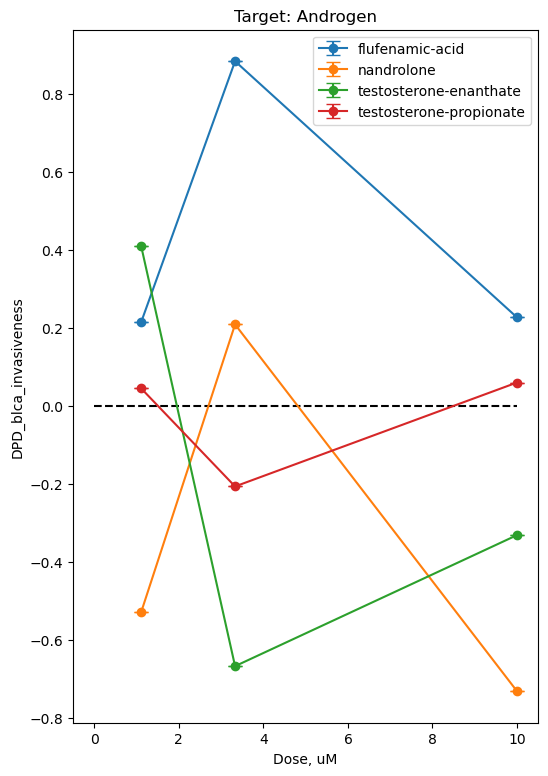

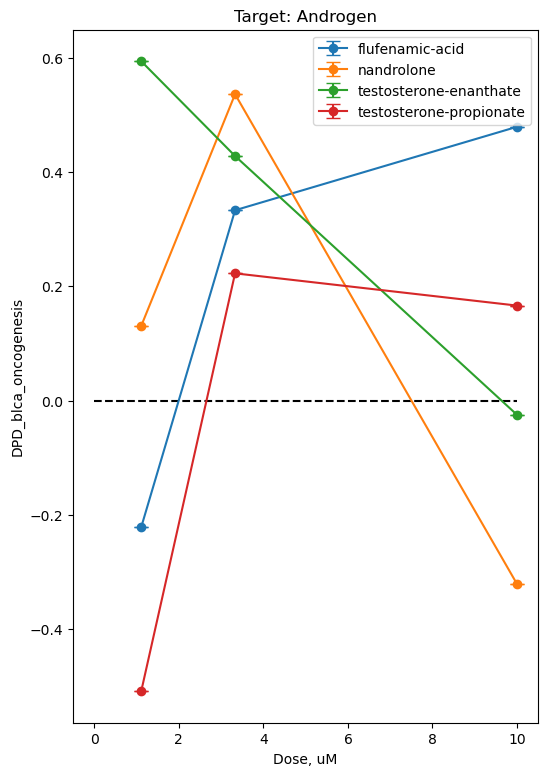

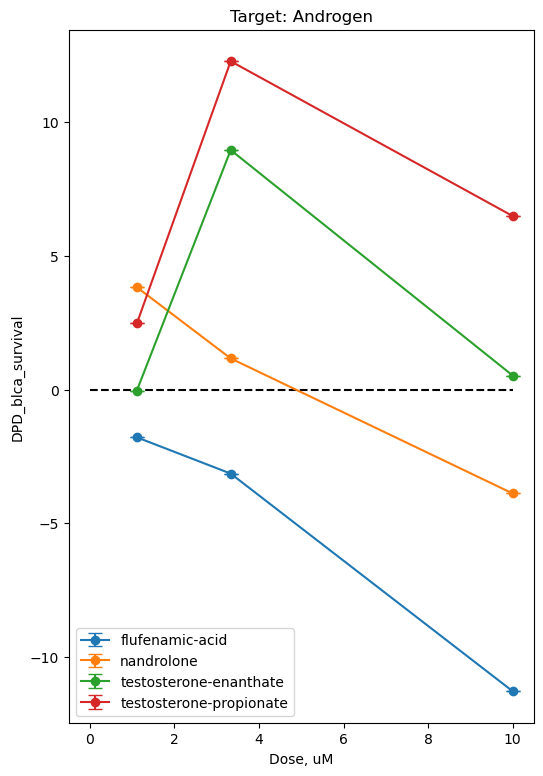

In [49]:
target_name = "Androgen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### PAK

In [31]:
target = "PAK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PAK: 0 []


In [24]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
PF-03758309,PAK4,"0.04 uM, 0.12 uM, 0.125 uM, 0.37 uM, 1.11 uM, ..."


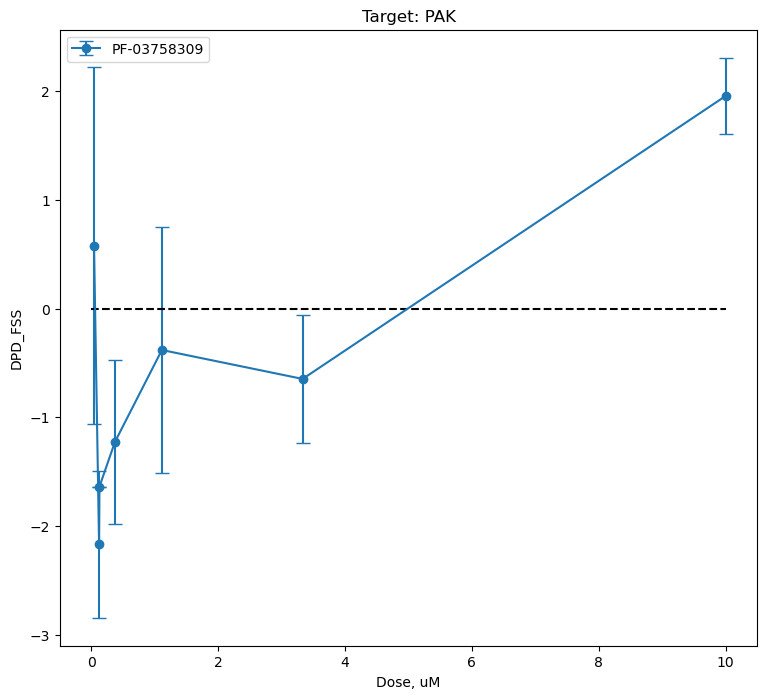

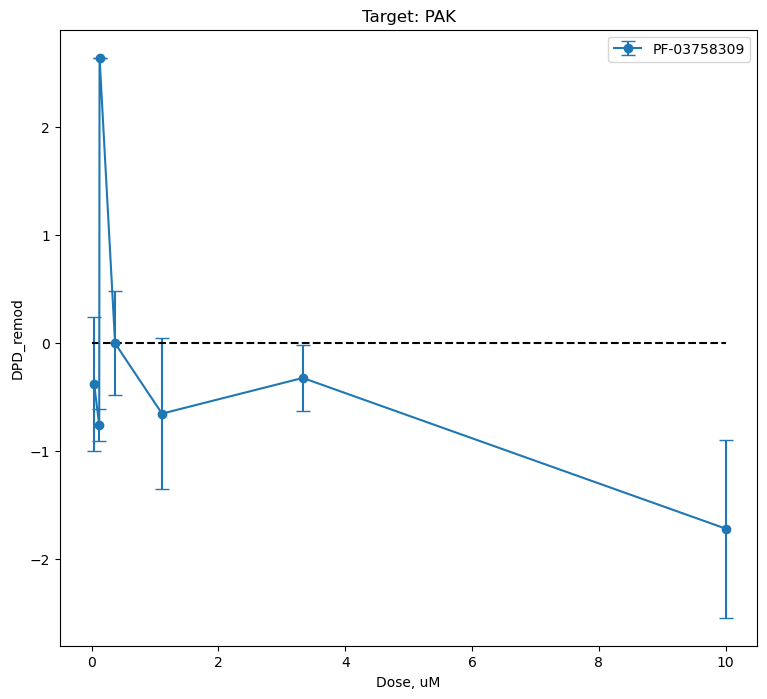

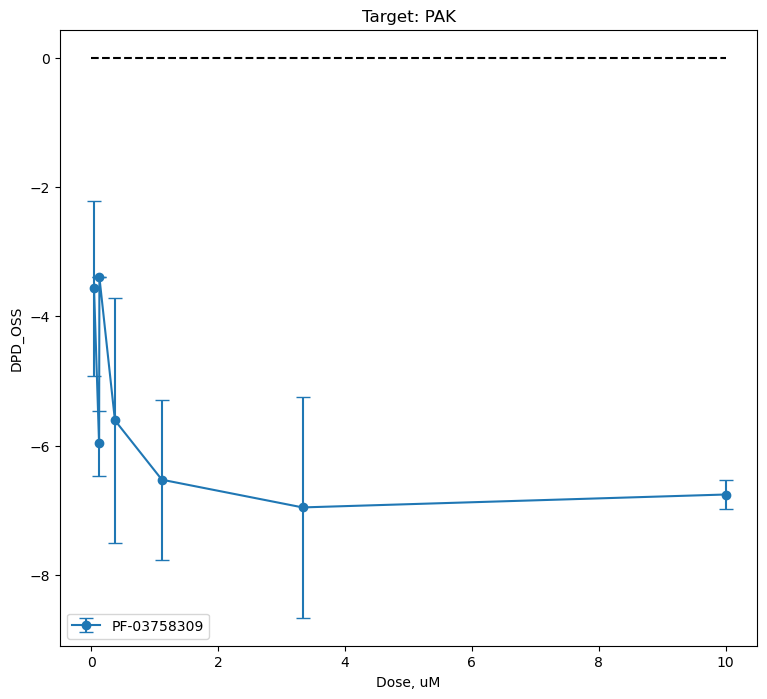

In [25]:
target_name = "PAK"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [26]:
print_drugs += target_drugs

In [27]:
# delete for PF-03758309 dose 10 uM

labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == "PF-03758309") & (sig_info_cell_df.dose_float == 10)].index.to_list()
print(labels)

['LJP009_HUVEC.A_24H:D01', 'LJP009_HUVEC_24H:D01']


### PI3K

In [358]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [359]:
#drugs_list = drugs + ["GSK-2334470", "A-66", "BGT-226", "BX-795"]
drugs_list=drugs
targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
gefitinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


ValueError: 'x' and 'y' must have the same size

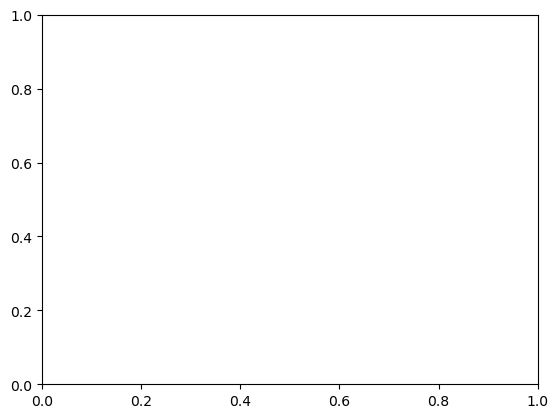

In [361]:
target_name = "EGFR"
target_drugs = drugs
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)



for drug in target_drugs:
    doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
    DPDs = []
    DPD_errs = []
    for dose in doses:
        labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
        DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
        if (len(labels) > 1):
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
        else:
            DPD_errs.append(0)
            plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
plt.legend()
plt.plot([0,10], [0,0], "--", color = "black")
plt.xlabel("Dose, uM")
plt.ylabel("DPD_" + DPD_val)
plt.title("Target: " + target_name)
plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
plt.show()

In [259]:
print_drugs += target_drugs

NameError: name 'print_drugs' is not defined

### ERK

In [ ]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "ERK"
target_drugs = ["AZ-628", "FR-180204", "GDC-0879", "GW-5074", "PD-0325901", "PD-184352", "TAK-733", "dabrafenib", "refametinib", "RAF-265"]
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### BET

In [ ]:
target = "BRD4"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["I-BET-151", "JQ-1-R", "PFI-1"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "BET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### Aurora

In [ ]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

In [ ]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

In [ ]:
target_name = "Aurora"
target_drugs = ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [364]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [330]:
sig_info_cell_df[sig_info_cell_df['pert_drug']=='bortezomib']

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:K07,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K07,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K09,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K09,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K10,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K10,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K11,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K11,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0
ASG002_BC3C_24H:K12,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:K12,1,trt_cp,bortezomib,"PSMB1, PSMB2, PSMB5",3,20 uM,20.0


In [365]:
drug = 'afatinib'  # Specify the drug you are interested in

# Filter the DataFrame to include only rows corresponding to the specified drug
drug_info = sig_info_cell_df[sig_info_cell_df.pert_drug == drug]

# Extract unique targets and doses for the specified drug
targets = ", ".join(sorted(list(set(drug_info.targets))))
doses = ", ".join(sorted(list(set(drug_info.dose))))

# Create a DataFrame with the extracted information
target_drugs_df = pd.DataFrame({"targets": 'TGFbR', "doses": [doses]}, index=[drug])

# Display the DataFrame
display(target_drugs_df)


,targets,doses
afatinib,TGFbR,"0.12 uM, 1.11 uM, 10 uM"


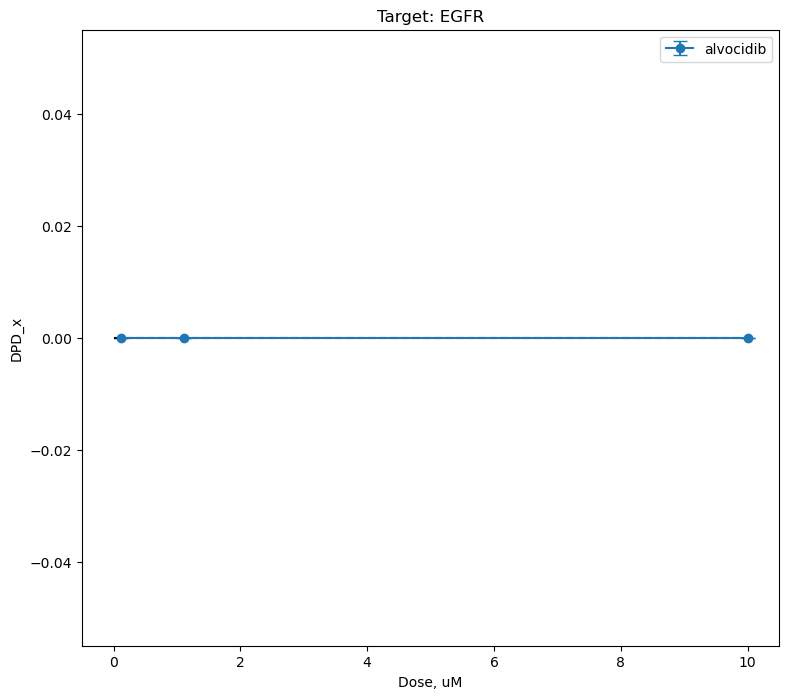

In [367]:
target_name = "EGFR"
target_drug = "alvocidib"  # Specify the drug you are interested in

plt.figure(figsize=(9, 8))
doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == target_drug].dose_float)))
for DPD_val in states:
    DPDs = []
    DPD_errs = []
    for dose in doses:
        labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == target_drug) & (sig_info_cell_df.dose_float == dose)].index
        DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
        if len(labels) > 1:
            DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
        else:
            DPD_errs.append(0)
    plt.errorbar(doses, DPDs, yerr=DPD_errs, fmt="o-", label=target_drug, capsize=5)

plt.legend()
plt.plot([0, 10], [0, 0], "--", color="black")
plt.xlabel("Dose, uM")
plt.ylabel("DPD_" + DPD_val)
plt.title("Target: " + target_name)
plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi=300)
plt.show()


In [47]:
print_drugs += target_drugs

### VEGFR

In [123]:
drugs_list = ["rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
rebastinib,,
lenvatinib,,
orantinib,,
foretinib,,
cediranib,,
sunitinib,,
tivozanib,,


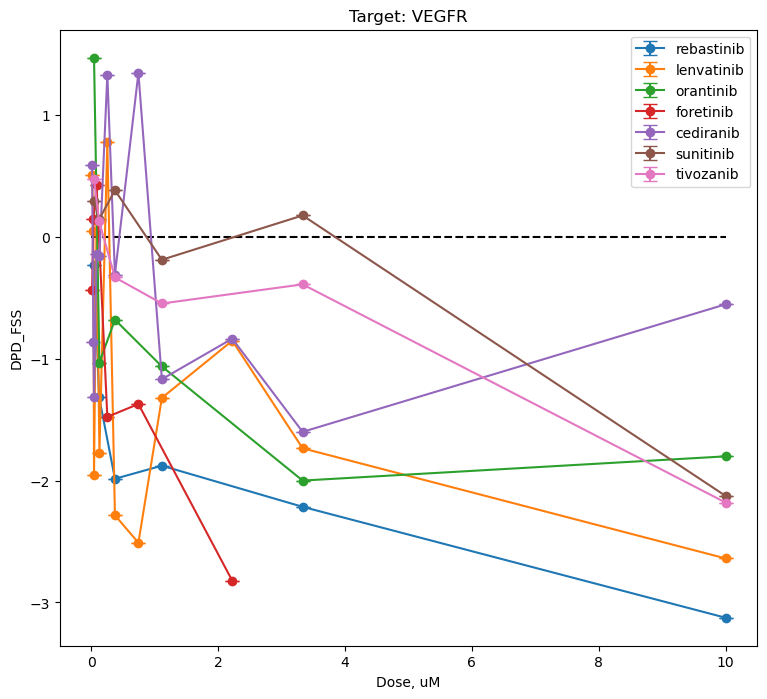

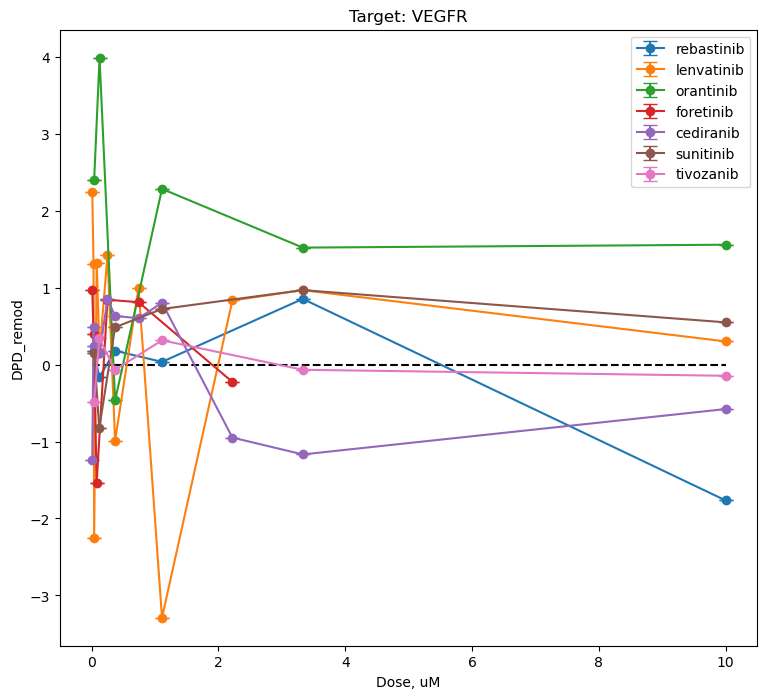

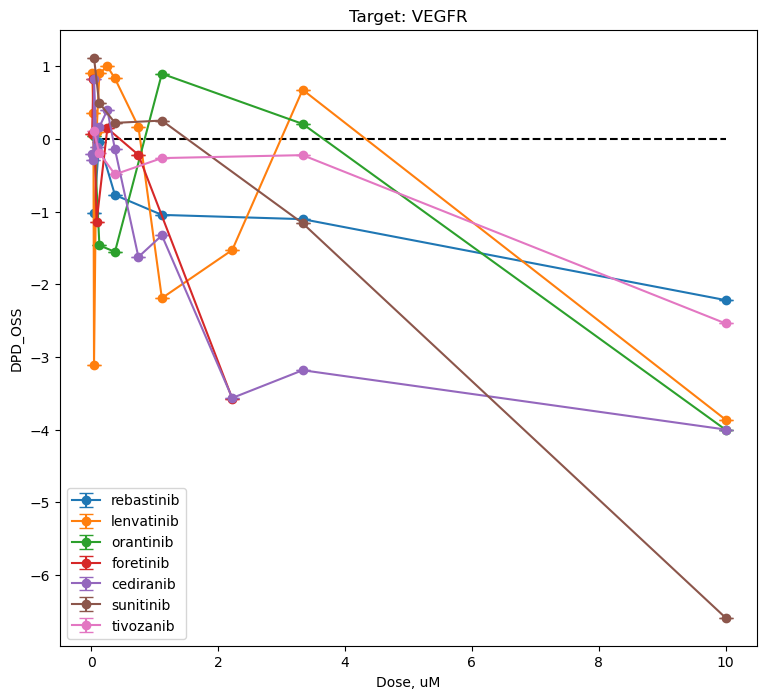

In [49]:
target_name = "VEGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [50]:
print_drugs += target_drugs

### PKC

In [124]:
target = "PRKC"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PRKC: 0 []


In [52]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
enzastaurin,PRKCB,"0.01 uM, 0.03 uM, 0.08 uM, 0.74 uM, 2.22 uM"


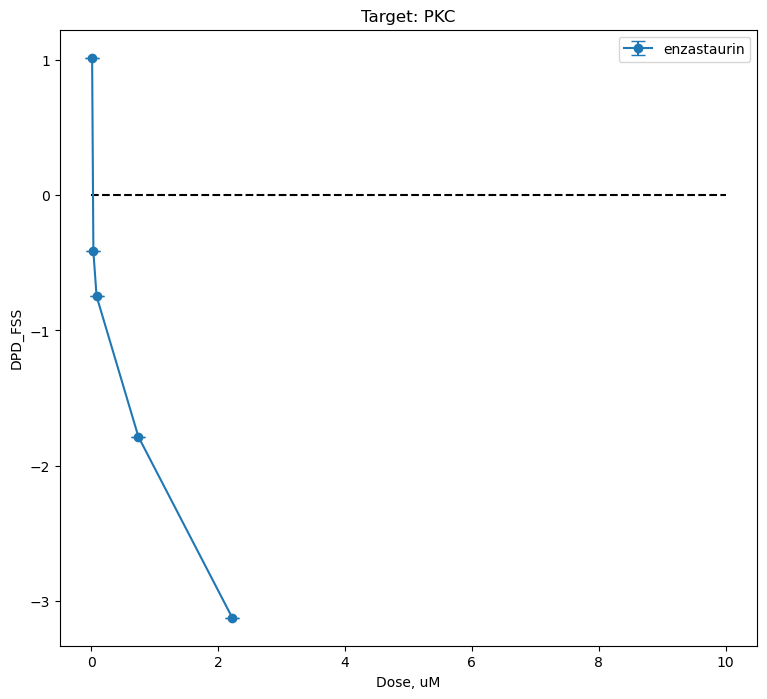

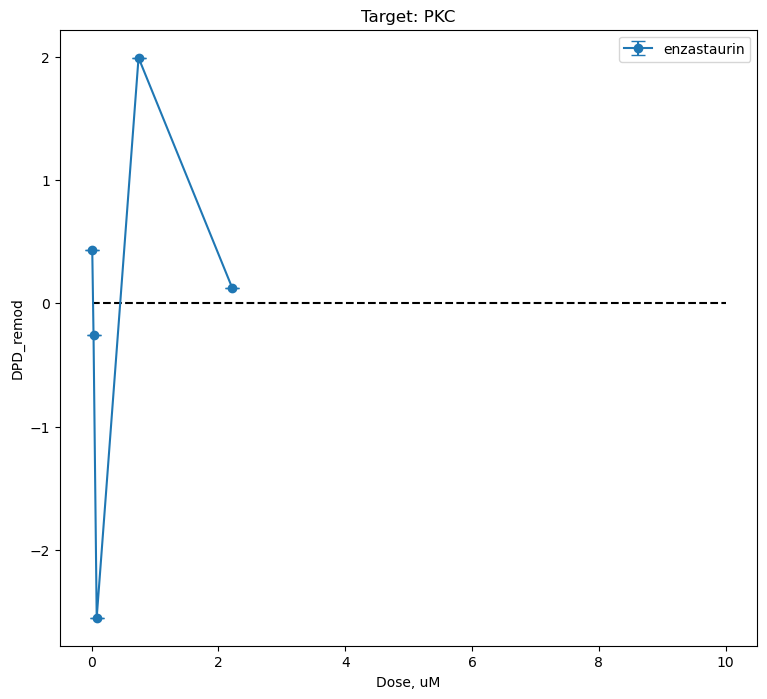

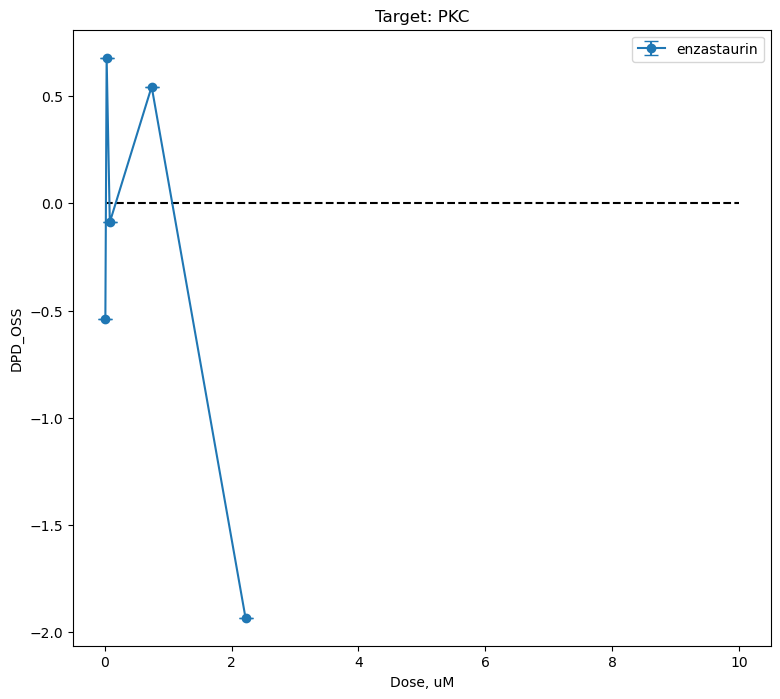

In [53]:
target_name = "PKC"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [54]:
print_drugs += target_drugs

### PTGS

In [125]:
target = "PTGS"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PTGS: 24 ['DUP-697', 'SC-560', 'aceclofenac', 'acemetacin', 'amtolmetin-guacil', 'asaraldehyde', 'diflunisal', 'etoricoxib', 'flufenamic-acid', 'icosapent', 'indoprofen', 'lornoxicam', 'lumiracoxib', 'metoxibutropate', 'nabumetone', 'nepafenac', 'niflumic-acid', 'paracetamol', 'rutaecarpine', 'salicylic-acid', 'sulfasalazine', 'suprofen', 'tiaprofenic-acid', 'tolmetin']


In [126]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
DUP-697,PTGS2,"1.11 uM, 3.33 uM"
SC-560,PTGS1,"1.11 uM, 10 uM, 3.33 uM"
aceclofenac,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
acemetacin,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
amtolmetin-guacil,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
asaraldehyde,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
diflunisal,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
etoricoxib,PTGS2,"1.11 uM, 10 uM, 3.33 uM"
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
icosapent,"PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"


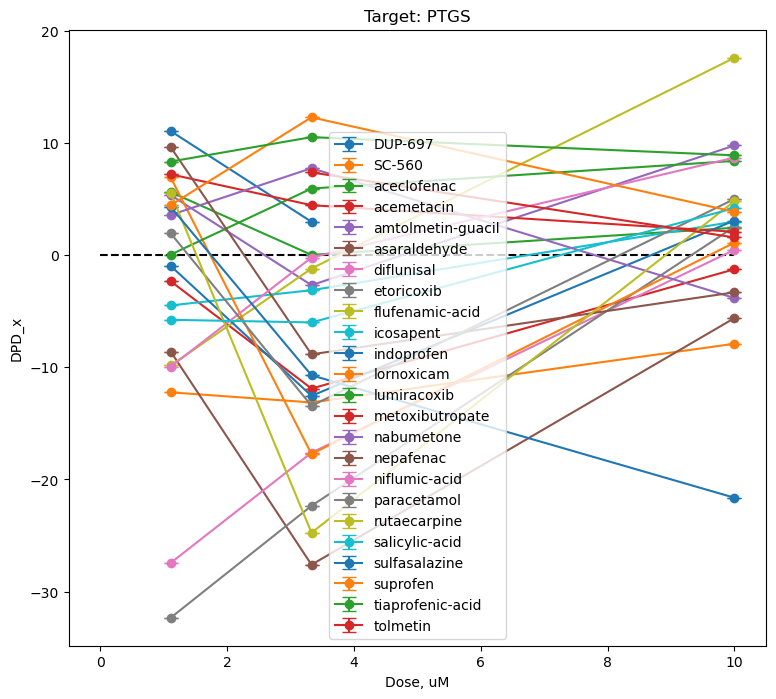

In [127]:
target_name = "PTGS"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [58]:
# delete module "PTGS"

### PSMB

In [128]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 3 ['MG-132', 'bortezomib', 'ixazomib']


In [129]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,"0.12 uM, 20 uM"
bortezomib,"PSMB1, PSMB2, PSMB5",20 uM
ixazomib,PSMB1,"0.12 uM, 1.11 uM, 10 uM"


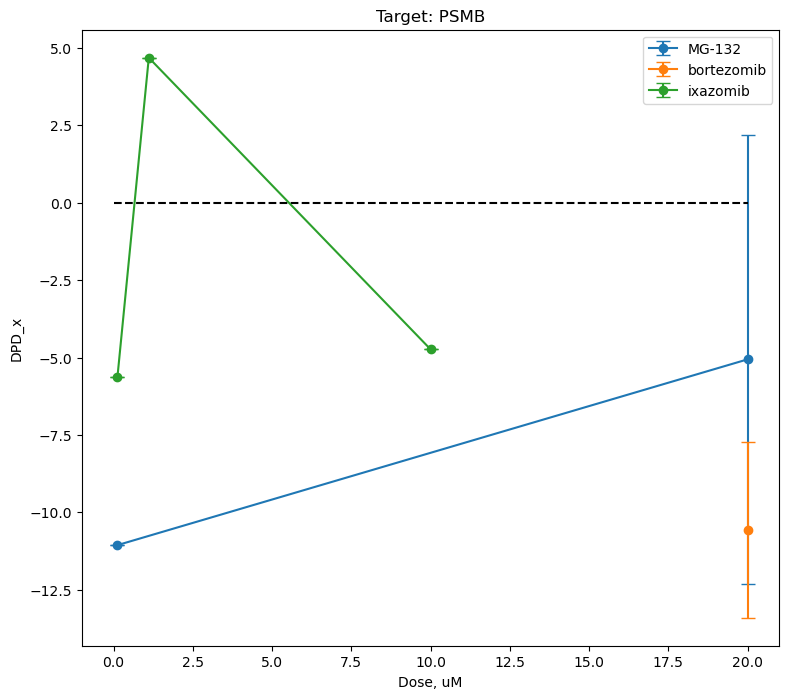

In [130]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [62]:
print_drugs += target_drugs

### GPBAR

In [63]:
target = "GPBAR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target GPBAR: 1 ['betulinic-acid']


In [64]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
betulinic-acid,GPBAR1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


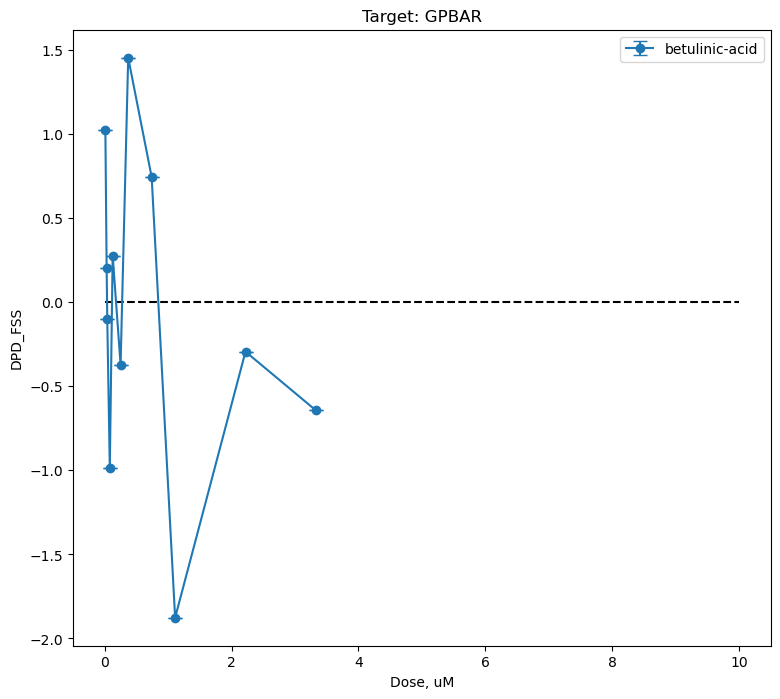

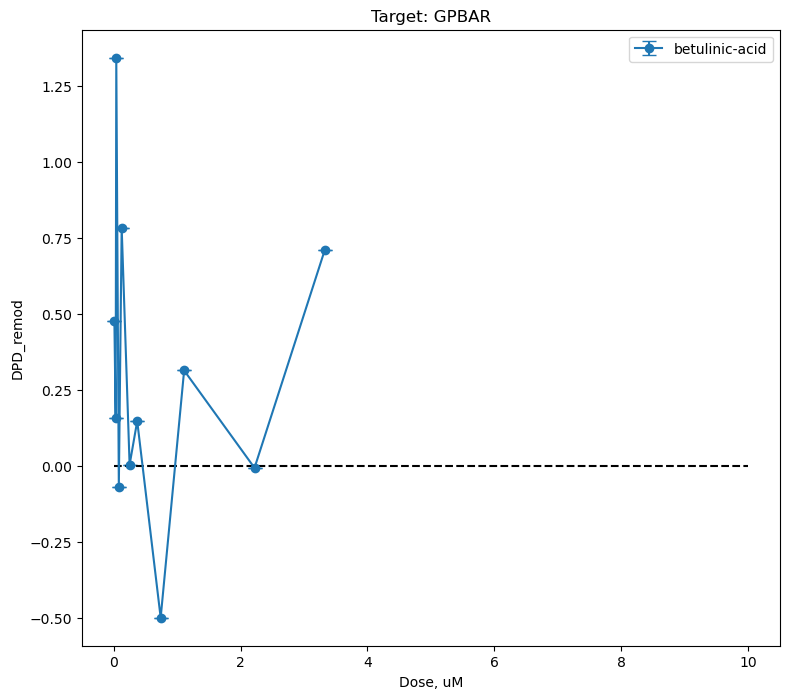

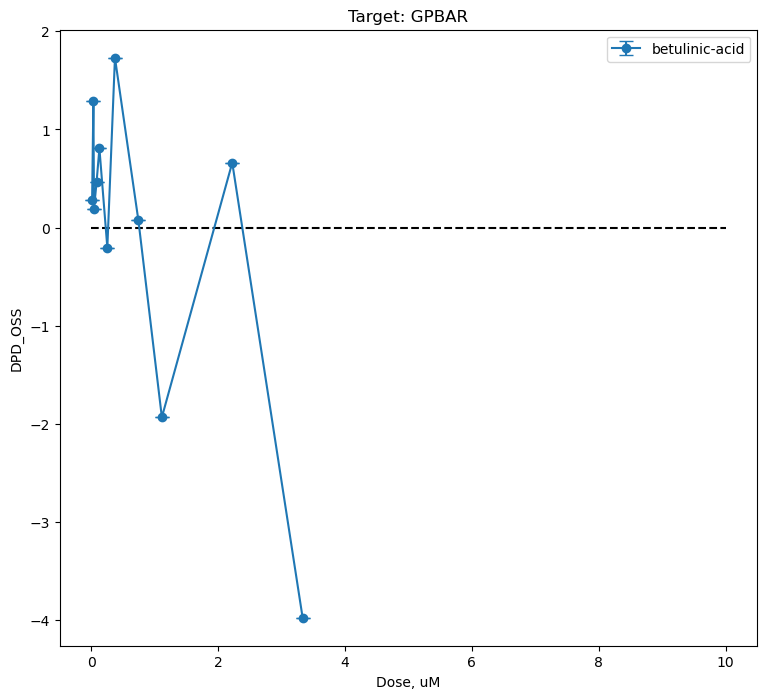

In [65]:
target_name = "GPBAR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [66]:
# delete module "GPBAR"

### PPARG

In [67]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 6 ['balaglitazone', 'bezafibrate', 'ciglitazone', 'indometacin', 'mifobate', 'rosiglitazone']


In [68]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
balaglitazone,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
bezafibrate,"PPARA, PPARD, PPARG","0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."
ciglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."
indometacin,"PPARG, PTGDR2, PTGS1, PTGS2","0.04 uM, 0.37 uM, 1.11 uM, 10 uM, 3.33 uM"
mifobate,PPARG,"0.01 uM, 0.03 uM, 0.08 uM, 0.25 uM, 0.74 uM, 2..."
rosiglitazone,PPARG,"0.04 uM, 0.125 uM, 0.37 uM, 1.11 uM, 10 uM, 3...."


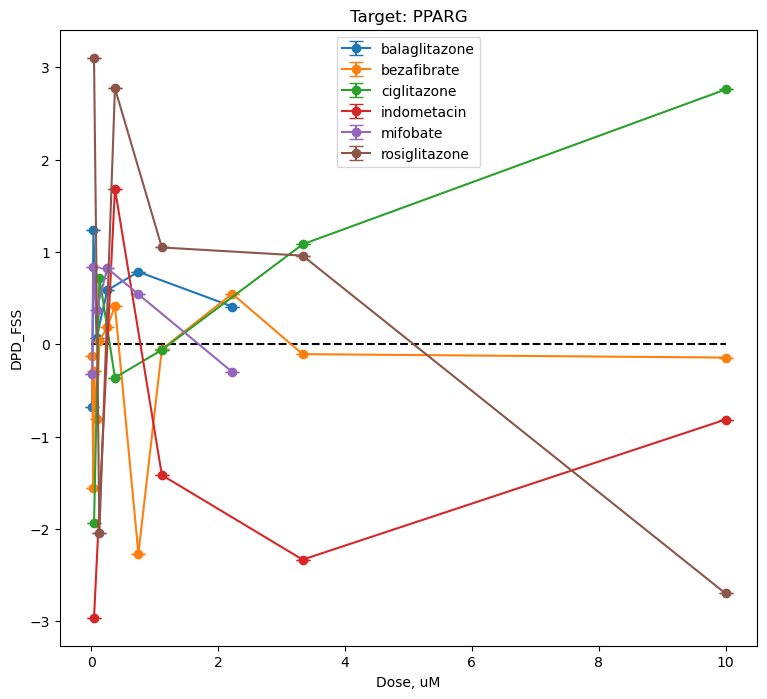

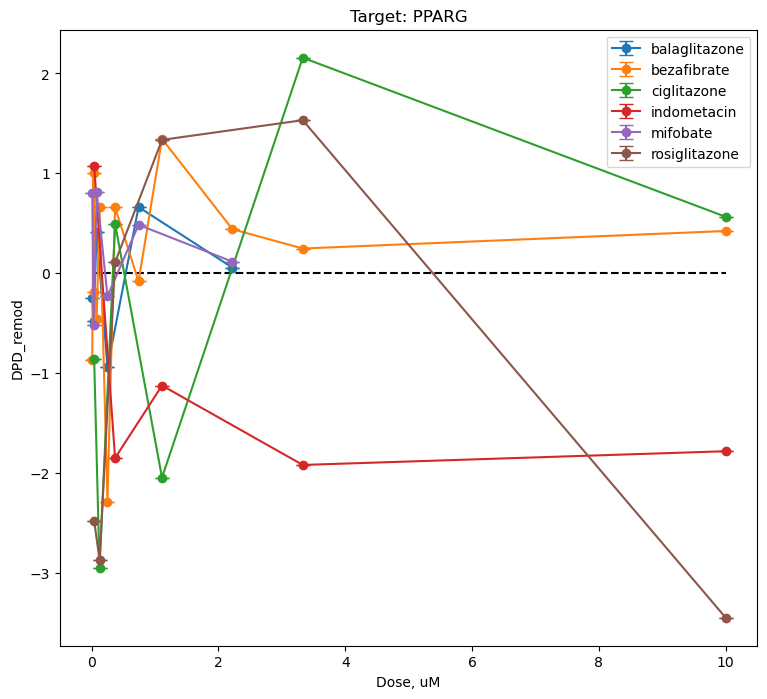

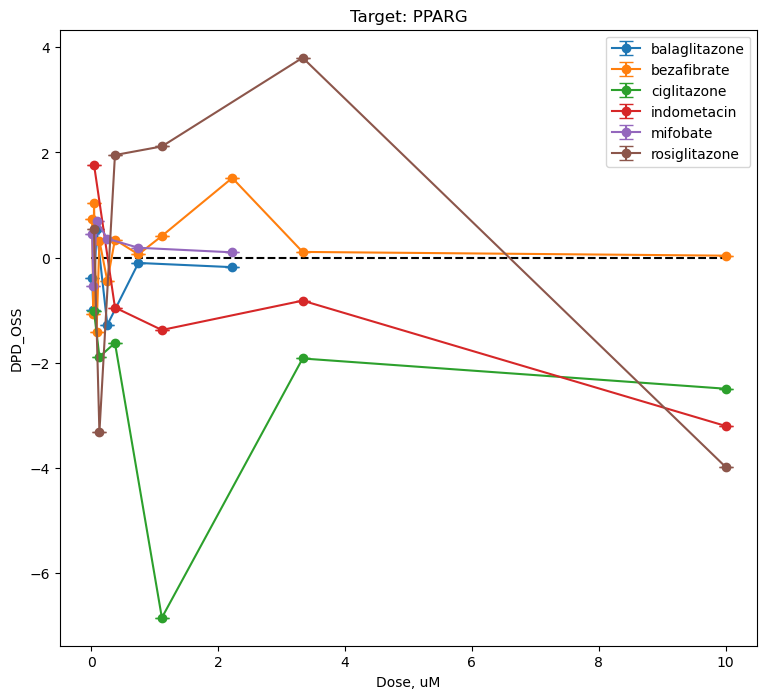

In [69]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### p53

In [333]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 6 ['AMG-232', 'HLI-373', 'RITA', 'SAR405838', 'nutlin-3', 'serdemetan']


In [334]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
HLI-373,MDM2,"1.11 uM, 10 uM, 3.33 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM, 3.33 uM"
SAR405838,MDM2,"1.11 uM, 10 uM, 3.33 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM, 3.33 uM"
serdemetan,MDM2,"1.11 uM, 10 uM, 3.33 uM"


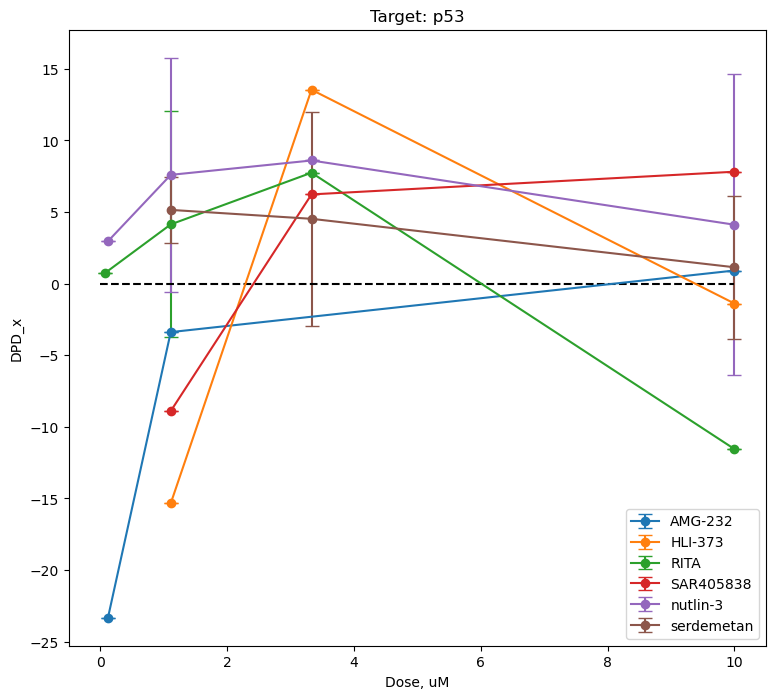

In [335]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Estrogen

In [336]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [337]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


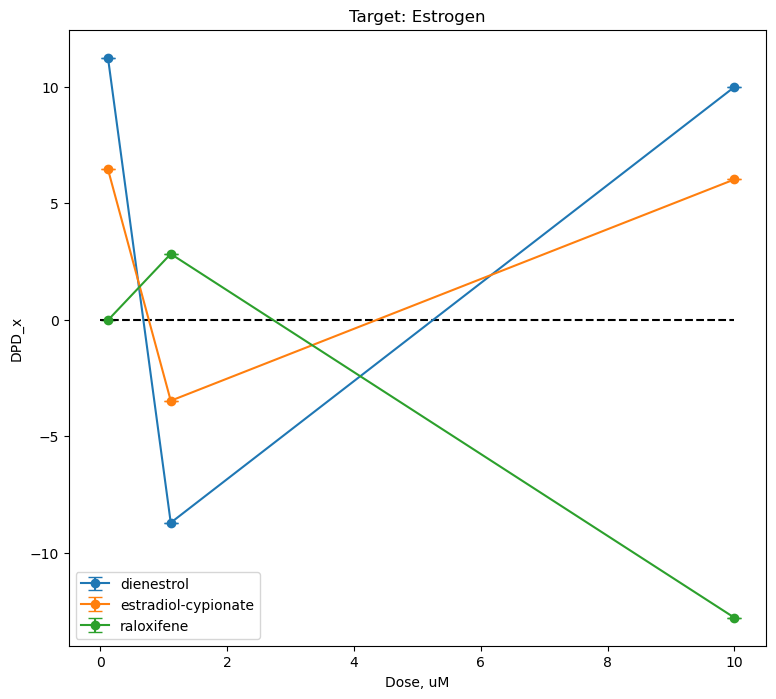

In [338]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [339]:
target = "AR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AR: 21 ['4-IBP', 'AG-14361', 'AM-580', 'API-001', 'BD-1063', 'GW-501516', 'L-693403', 'PRE-084', 'cutamesine', 'etofylline-clofibrate', 'flufenamic-acid', 'nandrolone', 'olaparib', 'oleoylethanolamide', 'oxandrolone', 'rimcazole', 'rucaparib', 'tamibarotene', 'testosterone-enanthate', 'testosterone-propionate', 'troglitazone']


In [340]:
drugs =['flufenamic-acid','nandrolone','testosterone-enanthate','testosterone-propionate']

In [341]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
flufenamic-acid,"AKR1C3, AR, PTGS1, PTGS2","1.11 uM, 10 uM, 3.33 uM"
nandrolone,"AR, CYP19A1, MAOA, MAOB, NISCH",10 uM
testosterone-enanthate,AR,"10 uM, 3.33 uM"
testosterone-propionate,AR,"1.11 uM, 10 uM, 3.33 uM"


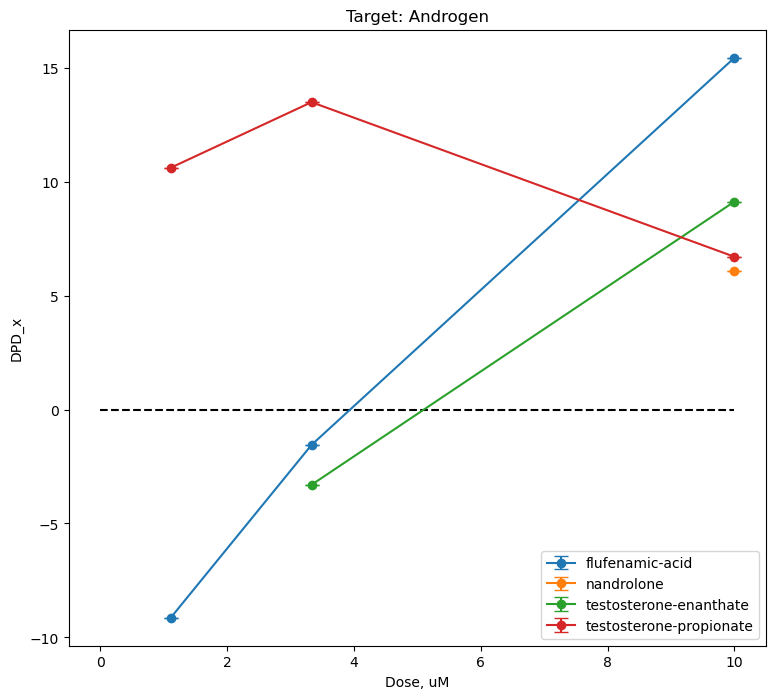

In [342]:
target_name = "Androgen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [70]:
# delete module "PPARG"

In [71]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
